# Исследование объявлений о продаже квартир

Исследование данных сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Цель - научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры, влияющие на цену квартир.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span>
<a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span>

</li><li><span>
<a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2">
<span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span>
</li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span>
</li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span>
</li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span>

## Изучение данных из файла

### Описание данных


* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

In [160]:
# импорт библиотеки pandas
import pandas as pd 

In [161]:
# чтение данных
data = pd.read_csv('./real_estate_data.csv', sep="\t")

In [162]:
# изучение содержимого
data.info() 
display(data.head())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

1. Некоторые столбцы записаны, не соблюдая общий стиль: `cityCenters_nearest`, `parks_around3000` и `ponds_around3000`; для удобства восприятия стоило бы их переименовать
2. В столбце `is_apartment`, согласно описанию, хранится булев тип, но записан как строки
3. Многие данные, которые записаны как вещественные числа, на деле являются целыми числами
4. Стоит измениить записи в столбце `first_day_exposition` с численного на дату и время
5. Судя по количеству записей по разным столбцам, в данных очень много пропусков, надо понять по какой причине и надо ли заменять или удалять эти записи
6. Максимальные и минимальные значения в некоторых столбцах не внушают доверия, нужно проверить количество вбросов по этим параметрам

## Предобработка данных

Переименуем столбцы, 'cityCenters_nearest' на 'center_nearest', чтобы соответствовать snake case, 'studio' на 'is_studio', чтобы соответстовало логике булевого типа, уберем '3000' из 'parks_around3000' и 'ponds_around3000'

In [163]:
data = data.rename(columns={'cityCenters_nearest': 'center_nearest', 
                     'parks_around3000': 'parks_around', 
                     'ponds_around3000' : 'ponds_around',
                     'studio': 'is_studio'
                     })

In [164]:
# проверим наличие явных дубликатов нет
print(len(data.drop_duplicates()))

23699


Явных дубликатов нет

In [165]:
print(data['is_apartment'].isna().sum(),
      data['is_apartment'].value_counts(), sep='\n', end='\n\n')

print(data['is_studio'].isna().sum(),
      data['is_studio'].value_counts(), sep='\n')

20924
is_apartment
False    2725
True       50
Name: count, dtype: int64

0
is_studio
False    23550
True       149
Name: count, dtype: int64


Так как столбец `is_studio` заполнен полностью и корректно, при этом студий в данной выборке всего 149 (на общее количество записей равное 23699), в таком случае, число апартаментов, равное 50, довольно правдоподобно, все пропуски - некорректная запись по причине неверного заполнения этой графы, можем принять все пропуски за False

### Приведение типов данных


In [166]:
# заполнение пропусков значением False
data['is_apartment'] = data['is_apartment'].where(
    data['is_apartment'].notna(), False).astype('bool')

In [167]:
# приведение графы с датой к DateTime
date_time_format = "%Y-%m-%dT%H:%M:%S"

data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format = date_time_format)

In [168]:
# цикл, чтобы пройти по каждому столбцу и записать те, в которых 
# встречаются только целые числа

columns_are_int = []

for column_name, column in data.items():
    if column.dtype != bool:
        try:
            if column[column % 1 > 0].count() == 0:
                columns_are_int.append(column_name)
        except:
            pass

print(*columns_are_int, sep='\n')

total_images
last_price
rooms
floors_total
floor
balcony
airports_nearest
center_nearest
parks_around
parks_nearest
ponds_around
ponds_nearest


Перечисленные столбцы хранят только целые числа, надо будет привести их к целочисленному типу, сейчас можем это сделать со столбцами, где нет пропущенных значений

In [169]:
# приведение нужных столбцов к целочисленным типам
int_columns_with_missing = list()

for column in columns_are_int:
    try:
        if data[column].max() < 32767: # если размер позволяет записать в int16
            data[column] = data[column].astype('int16')
        else:
            data[column] = data[column].astype('int64')
    except:
        int_columns_with_missing.append(column)

In [170]:
# проверим, что столбцы изменены
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int16         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int16         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int16         
 9   is_apartment          23699 non-null  bool          
 10  is_studio             23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [171]:
# столбцы с пропусками
print(int_columns_with_missing)

['floors_total', 'balcony', 'airports_nearest', 'center_nearest', 'parks_around', 'parks_nearest', 'ponds_around', 'ponds_nearest']


### Работа с пропусками

In [172]:
# заполним пропуски в столбце 'floors_total'
print(data['floors_total'].value_counts().head(10))

floors_total
5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
Name: count, dtype: int64


In [173]:
# подсчет количества пропусков
print('Количество:', data['floors_total'].isna().sum(), '\n'
      'Доля:', round(data['floors_total'].isna().sum()/len(data), 4))

Количество: 86 
Доля: 0.0036


Видим, что чаще всего в Петербурге встречаются 5ти- и 9тиэтажные здания, при этом пропущенных значений - 86, а их доля меньше процента, могли бы смело заполнить пропуски медианным значением (то есть 9), если бы не одна несостыковка:

In [174]:
# проверка пропусков в столбце 'floors_total' 
display(data['floors_total'].median())
blank_records = data.query('floors_total.isna()').index

9.0

В столбце `floor` нет пропусков, поступим так: пропущенные значения `floors_total`, где этаж меньше 9ти, заменим на медианное (то есть 9), где этаж от 10ти до 16ти включительно - до 16ти, выше - до 25

In [175]:
# функция для определения
def replace_with(row):
    if pd.isna(row['floors_total']):
        try:
            if row['floor'] > 9:
                return 16
            elif row['floor'] > 16:
                return 25 # выше 24 не поднимается
            return 9
        except:
            pass
    else:
        return row['floors_total']


# пробный датафрейм
data_to_check = {
    'id': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'floor': [4, 6, 11, 8, 9, 10, 16, 23, 9, 20],
    'floors_total': [5, None, 14, None, None, None, None, None, 9, 25]
}

# проверка правильности функции
data_to_check = pd.DataFrame(columns=['id', 'floor', 'floors_total'], 
                             data=data_to_check)
display(data_to_check.head(10)) # данные с пропусками

,id,floor,floors_total
0,0,4,5.0
1,1,6,NaN
2,2,11,14.0
3,3,8,NaN
4,4,9,NaN
5,5,10,NaN
6,6,16,NaN
7,7,23,NaN
8,8,9,9.0
9,9,20,25.0


In [176]:
data_to_check['floors_total'] = data_to_check.apply(replace_with, axis=1).astype('int16') 
display(data_to_check.head(10)) # данные после применения функции

,id,floor,floors_total
0,0,4,5
1,1,6,9
2,2,11,14
3,3,8,9
4,4,9,9
5,5,10,16
6,6,16,16
7,7,23,16
8,8,9,9
9,9,20,25


In [177]:
# применим к нашим данным
data['floors_total'] = data.apply(replace_with, axis=1).astype('int16')
display(data.take(blank_records)) # проверка правильности

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,center_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
186,12,11640000,65.2,2018-10-02,2,NaN,9,30.80,4,False,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033,28.1,2016-11-23,1,NaN,9,20.75,1,False,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348,70.8,2015-08-01,2,NaN,16,38.40,12,False,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191,93.6,2017-04-06,3,NaN,9,47.10,8,False,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000,39.0,2017-04-22,1,NaN,9,NaN,9,False,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,63.5,2017-05-24,2,2.8,9,NaN,3,False,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160,64.5,2017-04-02,2,NaN,16,31.70,20,False,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263,110.4,2016-11-20,3,NaN,9,45.38,6,False,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872,123.3,2017-04-25,3,NaN,16,50.40,18,False,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [178]:
# удалим из списка на изменение
int_columns_with_missing.remove('floors_total')

In [179]:
# проверим количество пропусков в столбце 'balcony'
print(data['balcony'].isna().sum())
print(data['balcony'].value_counts())

11519
balcony
1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: count, dtype: int64


Самая логичная причина пропусков в этом случае - отсутствие балкона, можно понять людей, которые пропустят графу "число балконов" вместо того, чтобы писать "0", заполним пропуски нулем за них

In [180]:
# заполнение пропусков
data['balcony'] = data['balcony'].fillna(0).astype('int16')
# удалим из списка на изменение
int_columns_with_missing.remove('balcony')

Подумаем, как можно заполнить пропуски в расстояния до аэропорта и центра

In [181]:
# импорт библиотеки numpy
import numpy as np

In [182]:
# изучим среднее расстояние и медианное по населенным пунктам
data_by_distance = np.round(data.pivot_table(
    index='locality_name', 
    values=['airports_nearest', 'center_nearest'], 
    aggfunc=['median', 'mean', 'min']), 3) 

# отсортируем по наименьшему отдалению от центра
data_by_distance.sort_values(by=('mean', 'center_nearest'))

median                            mean  \
                        airports_nearest center_nearest airports_nearest   
locality_name                                                              
Санкт-Петербург                  26757.5        12244.5        28046.186   
посёлок Парголово                53426.0        19311.0        53994.927   
поселок Мурино                   51553.0        21888.0        51553.000   
посёлок Стрельна                 28317.0        23506.0        28148.364   
посёлок Шушары                   17427.0        24212.0        16061.459   
посёлок Левашово                 52693.0        25727.0        52693.000   
посёлок Песочный                 54831.5        26099.5        54565.500   
посёлок Петро-Славянка           20605.0        27165.0        20605.000   
посёлок Лисий Нос                54988.5        27297.0        54988.500   
посёлок Александровская          12896.5        27468.0        12896.500   
посёлок Металлострой             25758.0        27602.0        25726.485   
посёлок Усть-Ижора               26510.5        28222.5        26510.500   
поселок Лисий Нос                55930.0        28246.0        55930.000   
Пушкин                           15766.0        27930.5        16447.870   
Красное Село                     25715.5        29140.5        26595.580   
Колпино                          26232.0        32018.0        26375.864   
посёлок Понтонный                30642.0        32354.0        30581.400   
Павловск                         20529.5        32683.0        21053.342   
посёлок Щеглово                  61908.0        34085.0        61908.000   
Сестрорецк                       56692.0        34821.0        56640.486   
Петергоф                         39231.0        33771.0        40184.677   
посёлок Сапёрный                 34147.5        35859.5        34142.667   
посёлок Белоостров               57769.0        38868.0        57769.000   
посёлок Репино                   61797.5        42896.5        62293.250   
Кронштадт                        67850.0        49575.0        67469.263   
Ломоносов                        48415.5        51677.0        48308.280   
Зеленогорск                      72282.0        53381.0        73300.250   
посёлок Молодёжное               84665.0        65764.0        84430.200   

                                                    min                 
                        center_nearest airports_nearest center_nearest  
locality_name                                                           
Санкт-Петербург              11601.292              0.0          181.0  
посёлок Парголово            19924.777          44346.0        17994.0  
поселок Мурино               21888.000          51553.0        21888.0  
посёлок Стрельна             23376.114          26770.0        21813.0  
посёлок Шушары               24243.388           9294.0        17012.0  
посёлок Левашово             25727.000          52693.0        25727.0  
посёлок Песочный             26475.250          52504.0        25867.0  
посёлок Петро-Славянка       27165.000          20605.0        27165.0  
посёлок Лисий Нос            27297.000          54068.0        26368.0  
посёлок Александровская      27468.000          12781.0        27352.0  
посёлок Металлострой         27561.348          24629.0        26696.0  
посёлок Усть-Ижора           28222.500          26500.0        28212.0  
поселок Лисий Нос            28246.000          55930.0        28246.0  
Пушкин                       28745.375          12157.0        24311.0  
Красное Село                 30020.284          23892.0        27317.0  
Колпино                      32113.772          23649.0        29436.0  
посёлок Понтонный            32293.450          28997.0        30709.0  
Павловск                     33206.921          19380.0        31533.0  
посёлок Щеглово              34085.000          61908.0        34085.0  
Сестрорецк                   34624.481          50031.0        31130.0 

Как и предполагалось, для разных населенных пунктов - разные среднее и медианное значения расстояния до аэропорта и центра (вероятно, Санкт-Петербурга, а не самого населенного пункта)

Напрягает минимум в графе `airports_nearest`, вряд ли недвижимость находится на территории аэропорта,проверим, сколько таких выбросов

In [183]:
# количество пропусков в столбце 'airports_nearest'
print(len(data[data['airports_nearest'] == 0]))
data[data['airports_nearest'] == 0].head()

1


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,center_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
21085,0,7000000,34.7,2018-09-23,1,2.7,9,19.8,3,False,...,6.0,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


Вероятно, программа, заполняющая расстояние до аэропорта, просто выдала неверные значения

Медианные значения не сильно отличаются от средних, но для чистоты заполним пропуски для каждого населенного пункта согласно медианному значению для этого населенного пункта, также поступим со строкой с расстоянием до аэропорта, равным 0 

In [184]:
missing_air = list()
missing_center = list()


# функции для заполнения
def fill_airport(row):
    if pd.isna(row['airports_nearest']):
        try:
            return data_by_distance.loc[row['locality_name']]['median']['airports_nearest']
        except KeyError:
            missing_air.append(row["locality_name"])
            return
        except:
            row['airports_nearest'] = ''
            return data_by_distance.loc[row['locality_name']]['median']['airports_nearest']
    else:
        return row['airports_nearest']


def fill_center(row):
    if pd.isna(row['center_nearest']):
        try:
            return data_by_distance.loc[row['locality_name']]['median']['center_nearest']
        except KeyError:
            missing_center.append(row["locality_name"])
            return 
        except:
            row['center_nearest'] = ''
            return data_by_distance.loc[row['locality_name']]['median']['center_nearest']
    else:
        return row['center_nearest']


# проверяем на пробном датафрейме
columns = ['airports_nearest', 'center_nearest', 'locality_name']
data_to_check = {
    'airports_nearest': [515.0, 353.0, None, 432.0, 394.0, None, 892.0, 482.0, None],
    'center_nearest': [None, 181.0, 472.0, None, 835.0, 953.0, None, 549.0, 786.0],
    'locality_name': ['Санкт-Петербург', 'Санкт-Петербург', 'Санкт-Петербург', 
                      'Кронштадт', 'Кронштадт', 'Кронштадт',
                      'посёлок Усть-Ижора', 'посёлок Усть-Ижора', 'посёлок Усть-Ижора']
}

data_to_check = pd.DataFrame(columns=columns, data=data_to_check)

# применяем к датафрейму
data_to_check['airports_nearest'] = data_to_check.apply(fill_airport, axis=1)
data_to_check['center_nearest'] = data_to_check.apply(fill_center, axis=1)

# проверка после применения
data_to_check.head(9)

,airports_nearest,center_nearest,locality_name
0,515.0,12244.5,Санкт-Петербург
1,353.0,181.0,Санкт-Петербург
2,26757.5,472.0,Санкт-Петербург
3,432.0,49575.0,Кронштадт
4,394.0,835.0,Кронштадт
5,67850.0,953.0,Кронштадт
6,892.0,28222.5,посёлок Усть-Ижора
7,482.0,549.0,посёлок Усть-Ижора
8,26510.5,786.0,посёлок Усть-Ижора


In [185]:
# количество пропусков до применения к столбцу 'airports_nearest'
print(data['airports_nearest'].isna().sum())
data['airports_nearest'] = data.apply(fill_airport, axis=1)
# после применения
print(len(missing_air), end='\n\n')

# аналогично к столбцу 'center_nearest'
print(data['center_nearest'].isna().sum())
data['center_nearest'] = data.apply(fill_center, axis=1)
print(len(missing_center))

5542
5394

5519
5394


In [186]:
# проверим совпадения не заполненных пропусков 
print(len(set(missing_air)), len(set(missing_center)))
print(set(missing_air) == set(missing_center))
missing = set(missing_air)

337 337
True


Получается, что пропущенные значения расстояния до центра и до аэропорта встречаются для одних и тех же населенных пунктов, и мы избавились только от нескольких пропусков, не сильно исправив ситуацию, видим явную связь.

In [187]:
# сохраним записи с пропущенными значениями
data_with_missing = (data.query('locality_name in @missing').replace(np.NaN, 0)
                     .pivot_table(index='locality_name', values=['airports_nearest', 'center_nearest'], 
                                  aggfunc=['count', 'sum']))

print(len(data_with_missing), data_with_missing['count']['airports_nearest'].sum())

print(data_with_missing.head())

print(data.query('locality_name in @missing')['locality_name'].value_counts().sort_index().head())

337 5435
                         count                             sum               
              airports_nearest center_nearest airports_nearest center_nearest
locality_name                                                                
0                           49             49        1007466.0       462435.0
Бокситогорск                16             16              0.0            0.0
Волосово                    36             36              0.0            0.0
Волхов                     111            111              0.0            0.0
Всеволожск                 398            398              0.0            0.0
locality_name
Бокситогорск     16
Волосово         36
Волхов          111
Всеволожск      398
Выборг          237
Name: count, dtype: int64


In [188]:
# посмотрим ближе на один из населенных пунктов
display(data[data['locality_name'] == 'Бокситогорск'].head(16))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,center_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
638,6,980000,47.1,2019-04-12,2,NaN,3,29.0,3,False,...,9.0,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,4,950000,44.0,2018-05-05,2,NaN,5,NaN,2,False,...,6.0,1,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,156.0
1053,13,550000,29.0,2018-02-01,1,5.0,3,NaN,1,False,...,NaN,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1761,11,999000,62.0,2018-02-15,4,NaN,5,46.0,2,False,...,7.0,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,226.0
3010,6,850000,48.0,2016-03-11,2,NaN,5,NaN,5,False,...,NaN,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,174.0
3731,10,1310000,65.6,2019-02-22,3,NaN,5,42.0,4,False,...,7.5,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5821,7,820000,51.0,2017-12-09,2,NaN,5,32.0,5,False,...,8.5,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,130.0
8630,3,560000,32.0,2018-06-16,1,NaN,3,17.0,1,False,...,6.0,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,45.0
8767,6,650000,45.0,2017-06-24,2,NaN,5,30.0,1,False,...,6.0,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,68.0
8779,9,620000,36.0,2018-01-15,1,NaN,5,19.0,5,False,...,8.0,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,45.0


У 337 населенных пунктов ни в одной строке не указаны расстояния до аэропорта, до центра, возможно не указаны данные о водоемах и парках поблизости, а 1 населенный пункт вовсе не назван, записей о нем меньше пятидесяти, данные с этим населенным пунктом удалим, возможно этот город и не относится к исследованию

In [189]:
# удаление населенных пунктов без названиия 
data.dropna(subset=['locality_name'], inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int16         
 1   last_price            23650 non-null  int64         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int16         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23650 non-null  int16         
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int16         
 9   is_apartment          23650 non-null  bool          
 10  is_studio             23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony              

In [190]:
# заменим пропуски на нули
missing_data = (data.query('locality_name in @missing').replace(np.NaN, 0)
                .pivot_table(index='locality_name', 
                values=('airports_nearest', 'center_nearest', 'parks_around', 
                        'parks_nearest', 'ponds_around', 'ponds_nearest'),
                aggfunc='sum')
)
missing_data.head(15)


,airports_nearest,center_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest
locality_name,,,,,,
Бокситогорск,0.0,0.0,0.0,0.0,0.0,0.0
Волосово,0.0,0.0,0.0,0.0,0.0,0.0
Волхов,0.0,0.0,0.0,0.0,0.0,0.0
Всеволожск,0.0,0.0,0.0,0.0,0.0,0.0
Выборг,0.0,0.0,0.0,0.0,0.0,0.0
Высоцк,0.0,0.0,0.0,0.0,0.0,0.0
Гатчина,0.0,0.0,0.0,0.0,0.0,0.0
Ивангород,0.0,0.0,0.0,0.0,0.0,0.0
Каменногорск,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
# выведем количество населенных пунктов в данных
print(len(data['locality_name'].unique()))

364


337 населеных пунктов из 365 всего, и так много данных отсутствуют, при этом обьявлений их этих пунктов 5 с половиной тысяч при общем количестве обьявлений, равном 23 тысячам

В таком случае их лучше не заполнять какими-либо медианными, а оставить пропущенными

In [192]:
# количество пропусков в столбце 'ceiling_height' 
print(data['ceiling_height'].isna().sum())

9160


count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


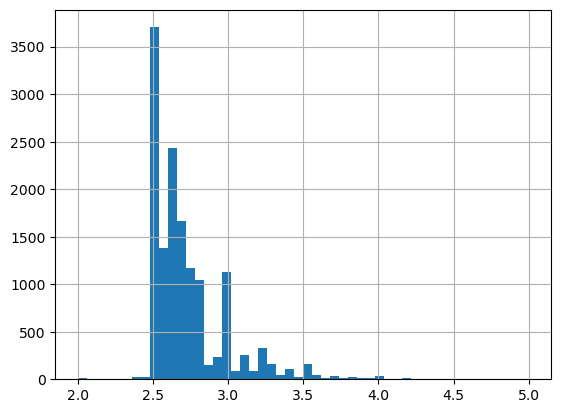

In [193]:
# изучим содержимое столбца
data['ceiling_height'].hist(bins=50, range=(2, 5))
print(data['ceiling_height'].describe())

По некоторым данным, минимальной нормой высоты потолка считается 2.4 метра

Высота потолка в 100 метров - ситуация невероятная, в 4 метра еще кое-как правдоподобно, возможно дело в том, что в частных домах указывали высоту всего дома.

In [194]:
# количество неправдоподобных значений
print(data.query('ceiling_height < 2.4')['ceiling_height'].count())
print(data.query('ceiling_height >= 5')['ceiling_height'].count())

21
37


In [195]:
# количество пропусков
print(data['ceiling_height'].isna().count())

23650



Отбросим значения выше 5 и ниже 2.4 метров и заменим все пропуски на медианное значение

<Axes: >

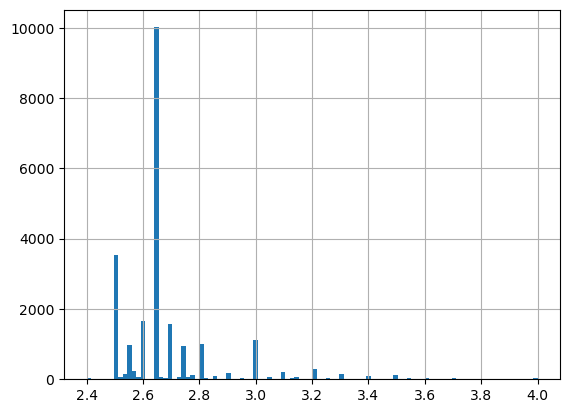

In [196]:
# заменим их на медианное значение
data.loc[(data['ceiling_height'] < 2.4) | (data['ceiling_height'] > 4), 'ceiling_height'] = 2.65

# заменим пропуски на медианное значение
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)

# визуализируем исправленные данные
data['ceiling_height'].hist(bins=100)

Итого остаются нетронутыми `living_area` и `kitchen_area` в некоторых местах, поскольку там значения скорее зависят от цены на недвижимость, а не от медианных значений, поэтому пока оставим пропущенными, а также расстояния до аэропорта, центра города, водоемов и парков, поскольку большой процент данных там отсутствует, и `days_exposition`, причину пропуска там можно обьяснить тем, что к моменту выгрузки данных объявления еще не были сняты

## Расчеты и добавление результатов в таблицу

Посчитаем и добавим в таблицу: 
1. цену квадратного метра
2. этаж квартиры; варианты — первый, последний, другой
3. день недели, месяц и год публикации объявления
4. соотношение жилой и общей площади, а также отношение площади кухни к общей

In [197]:
# цена квадратного метра
data['price_per_sqm'] = data['last_price'] / data['total_area']

Выше мы заполнили пропуски в столбце `floor`, это исказит меньше процента данных, но упростит добавление в таблицу нового столбца

In [198]:
# функция для добавления категории этажа
def add_floor_level_category(row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    return 'Другой'


data['floor_level_category'] = data.apply(add_floor_level_category, axis=1)
# посмотрим количество квартир по категориям
data.value_counts('floor_level_category')

floor_level_category
Другой       17403
Последний     3335
Первый        2912
Name: count, dtype: int64

In [199]:
# добавим столбцы для дня недели, месяца и года размещения объявления
data['exposition_weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['exposition_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['exposition_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [200]:
# функции для добавления отношения площадей кухни и жилых комнат к общей 
def add_living_to_total(row):
    try:
        return row['living_area'] / row['total_area']
    except: # на случай вызова ошибки из-за пропусков
        return None
    

def add_kitchen_to_total(row):
    try:
        return row['kitchen_area'] / row['total_area']
    except: 
        return None

In [201]:
# применим функции к датафрейму
data['living_to_total'] = data.apply(add_living_to_total, axis=1)
data['kitchen_to_total'] = data.apply(add_kitchen_to_total, axis=1)

## Исследовательский анализ данных

### Изучим данные о площадях квартир

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

<Axes: >

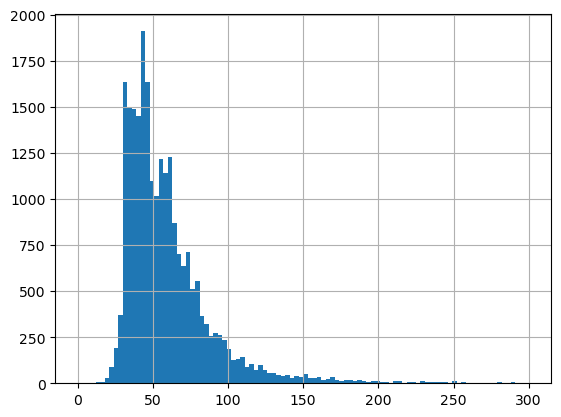

In [202]:
# изучим значения и построим гистограмму для площадей квартир
display(data['total_area'].describe())
data['total_area'].hist(bins=100, range=[0, 300])

Вызывают сомнения минимальная площадь - 2 квадратных метра, учитывая минимальную допустимую площадь жилья в 24 квадратных метра

Абсолютное количество: 132 
Относительное: 0.005581395348837209


<Axes: >

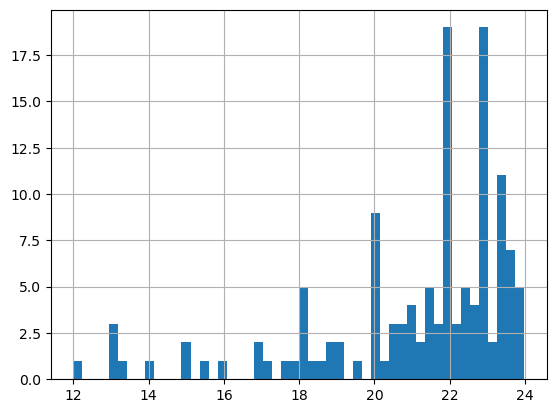

In [203]:
# посмотрим распределение жилья меньше 24 квадратных метров
print('Абсолютное количество:', 
      data[data['total_area'] < 24]['total_area'].count(),
      '\nОтносительное:',
      data[data['total_area'] < 24]['total_area'].count() / data.shape[0])
data[data['total_area'] < 24]['total_area'].hist(bins=50)

Таких выбивающихся значений меньше одного процента, их удаление не критично,поэтому можно их отбросить за неправдоподобность

In [204]:
data = data.drop(data[data['total_area'] < 20].index)
print(data['total_area'].count())

23623


### Изучим данные о количестве комнат

In [205]:
# подсчет количества объявлений по количеству комнат
data.value_counts('rooms')

rooms
1     8017
2     7924
3     5797
4     1175
5      326
0      189
6      105
7       59
8       12
9        8
10       3
11       2
14       2
12       1
15       1
16       1
19       1
Name: count, dtype: int64

Так как квартир больше 9ти комнат единицы, их данные не репрезентативные, квартиры, где ноль комнат, можно обьяснить либо ошибкой при переносе данных (где число комнат было не указано, заменили на 0), либо тем, что это студии или квартиры свободной планировки

In [206]:
# количество комнат у студий
display(data.query('is_studio == True').value_counts('rooms').head())
# количество студий с указанным нулем комнат
display(data.query('rooms == 0').value_counts('is_studio').head())
# количество комнат у квартир свободного плана
display(data.query('open_plan == True').value_counts('rooms').head())
# количество свободного плана квартир с указанным нулем комнат
display(data.query('rooms == 0').value_counts('open_plan').head())
# количество записей одновременно открытого плана и студий
display(data.query('rooms == 0 & open_plan & is_studio')['rooms'].count())

rooms
0    131
1     11
Name: count, dtype: int64

is_studio
True     131
False     58
Name: count, dtype: int64

rooms
0    58
1     3
3     2
2     1
4     1
Name: count, dtype: int64

open_plan
False    131
True      58
Name: count, dtype: int64

0

Отсюда видим, что все квартиры, в которых указано нулевое количество комнат, либо студии, либо свободной планировки, то есть ошибка напрямую связана с видом квартиры, и было бы не лишним исправить количество комнат на единицу

In [207]:
# замена нулевых значений на единицу
data[data['rooms'] == 0]['rooms'] = 1

C:\Users\reserford\AppData\Local\Temp\ipykernel_8944\2914598206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data['rooms'] == 0]['rooms'] = 1


### Изучим данные о цене

count    2.362300e+04
mean     6.546376e+06
std      1.090149e+07
min      1.219000e+04
25%      3.420000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<Axes: >

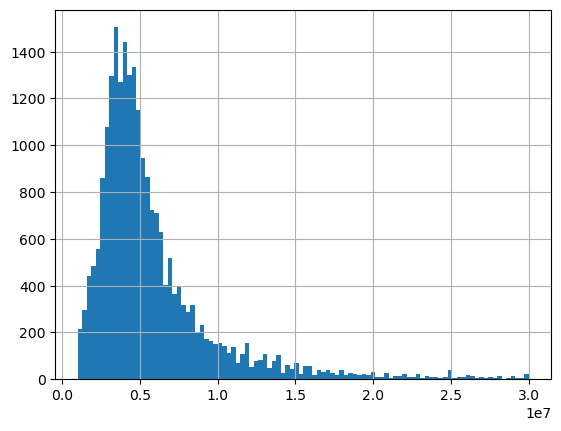

In [208]:
# изучим значения и построим гистограмму для цен
display(data['last_price'].describe())
data['last_price'].hist(bins=100, range=[1.0e+06, 30.0e+06])

Гистограмма повторяет распределение Пуассона, то есть данные правдоподобны, медианная цена квартир около 4-х с половиной миллионов рублей, среднее - 6 с половиной млн.р.

Посмотрим на цены меньше миллиона

<Axes: >

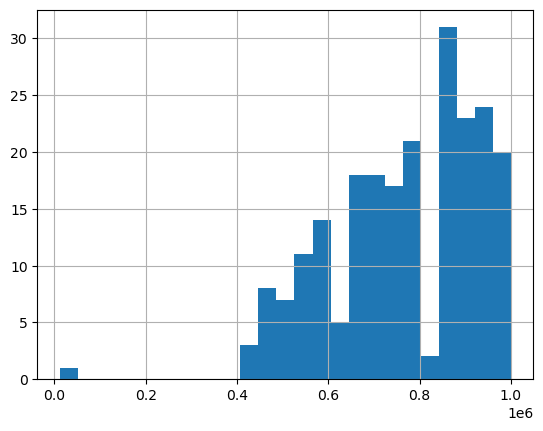

In [209]:
data.query("last_price < 1000000")['last_price'].hist(bins=25)

Кажется подозрительной цена недвижимости меньше миллиона, избавимся от выброса в 12 тысяч, но удалять недвижимость ценой меньше миллиона не стоит, так как это может быть реальная цена, которая, возможно, укажет на какую-то закономерность 

In [210]:
data = data.drop(data[data['last_price'] < 400000].index)

### Изучим распределение цен по городам

<Axes: xlabel='locality_name'>

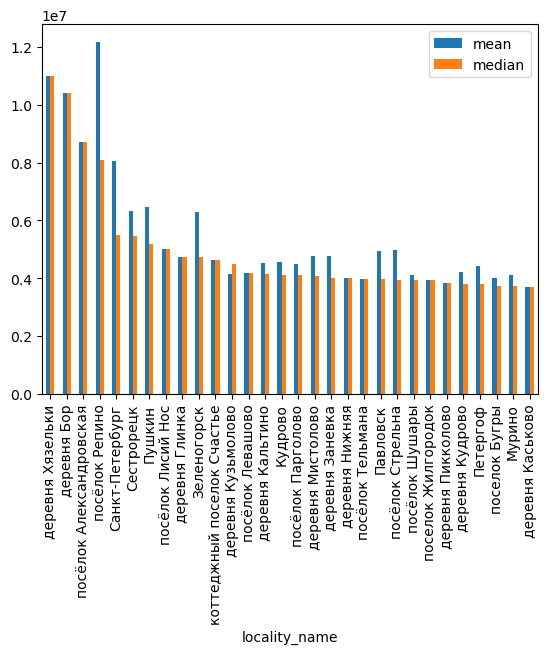

In [211]:
# построим распределение цен по городам
price_by_locality = data.pivot_table(index='locality_name', 
                 values='last_price', 
                 aggfunc=('mean', 'median')
                 ).sort_values(['median'], ascending=False).head(30)
# построим столбчатую диаграмму
price_by_locality.plot(kind='bar')

На этой диаграмме видим, что средняя цена недвижимости в поселке Репино больше, чем в любых других

In [212]:
# посчитаем количество записей в поселке Репино
print(data.query('locality_name == "посёлок Репино"').shape[0])
display(data.query('locality_name == "посёлок Репино"'))

4


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around,ponds_nearest,days_exposition,price_per_sqm,floor_level_category,exposition_weekday,exposition_month,exposition_year,living_to_total,kitchen_to_total
2454,12,28000000,160.0,2016-10-24,3,3.00,2,92.0,2,False,...,0.0,NaN,NaN,175000.000000,Последний,0,10,2016,0.575000,0.187500
5659,2,11067416,160.7,2018-08-01,2,3.00,2,NaN,1,False,...,0.0,NaN,238.0,68870.043559,Первый,2,8,2018,NaN,NaN
10935,12,4500000,56.0,2015-10-21,3,2.55,5,41.6,5,False,...,0.0,NaN,703.0,80357.142857,Последний,2,10,2015,0.742857,0.107143
15483,10,5100000,55.0,2018-02-24,3,2.50,5,NaN,4,False,...,0.0,NaN,60.0,92727.272727,Другой,5,2,2018,NaN,NaN


Причиной тому малое количество объявлений и одно выдающееся значение

Сосредоточимся на населенных пунктах с наибольшим числом объявлений

<Axes: xlabel='locality_name'>

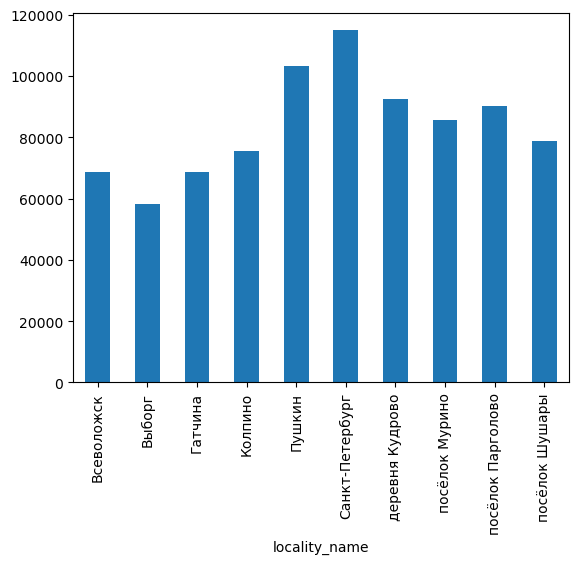

In [213]:
# сохраним названия 10ти населенных пунктов 
data_top = data.value_counts('locality_name')[:10]
# соберем данные по этим населенным пунктам в отдельном датафрейме
data_top_localities = data.query('locality_name in @data_top.index'
                                 ).pivot_table(index='locality_name',
                                               values=['last_price', 
                                                       'price_per_sqm'],
                                               aggfunc='mean')
# построим распределение цен за квадратный метр
data_top_localities['price_per_sqm'].plot(kind='bar')

<Axes: xlabel='locality_name'>

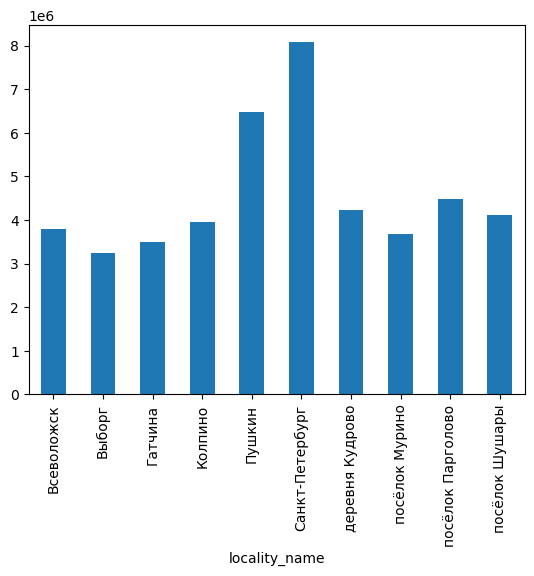

In [214]:
# построим распределение общих цен 
data_top_localities['last_price'].plot(kind='bar')

Из этих данных следует, что самое дорогое жилье - в Санкт-Петербурге, а самое дешевое - в Выборге

Возможная причина, по которой в поселках и деревнях цена жилья невысокая при довольно высокой стоимости квадратного метра, что средняя площадь меньше, чем в других населенных пунктах

<Axes: xlabel='locality_name'>

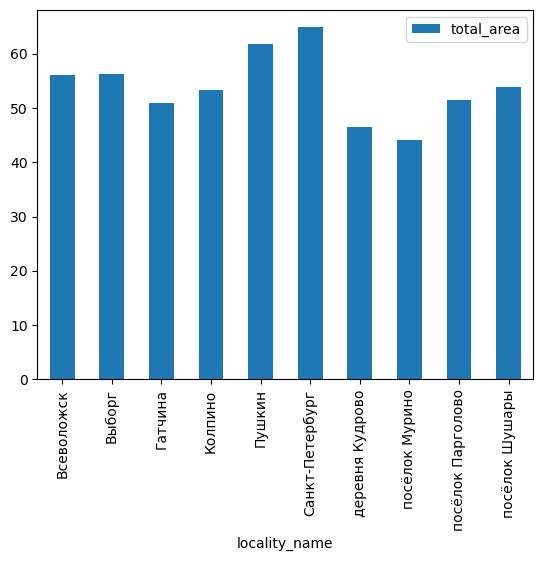

In [215]:
# построим распределение средней площади по населенным пунктам
data.query('locality_name in @data_top.index'
           ).pivot_table(index='locality_name',
                         values=['total_area'],
                         aggfunc='mean').plot(kind='bar')

Теория подтвердилась

### Влияние количества комнат и высоты потолков на цену

<Axes: xlabel='rooms'>

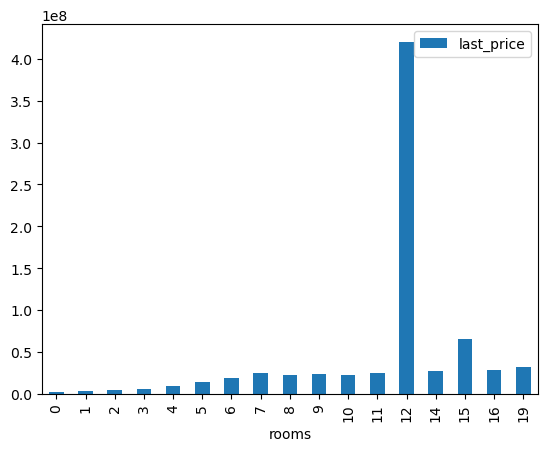

In [216]:
data.pivot_table(index='rooms', 
                 values=['last_price'], 
                 aggfunc='median').plot(kind='bar')

Из-за выдающихся значений после 10ти комнат, потому что таких квартир крайне мало, график становится трудночитаемым

<Axes: xlabel='rooms'>

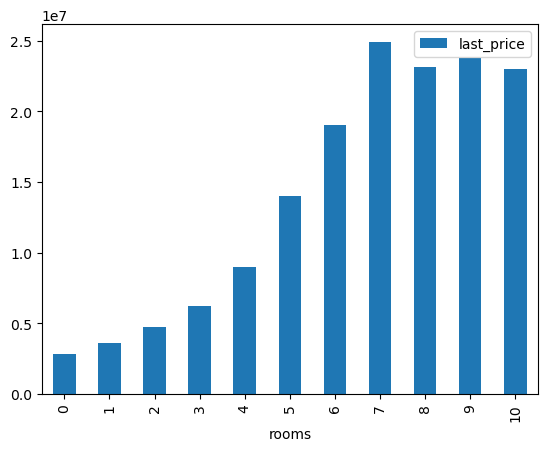

In [217]:
# график для жилья меньше 10ти комнат
data.pivot_table(index='rooms', 
                 values=['last_price'], 
                 aggfunc='median').query('rooms <= 10').plot(kind='bar')

Что и было ожидаемo, с возрастанием количества комнат растет и цена, поскольку обычно большое количество комнат так же коррелирует с большей жилой площадью

C:\Users\reserford\AppData\Local\Temp\ipykernel_8944\757286329.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd.plotting.scatter_matrix(price_other_dependences.query(


median  count  price_diff_median
floor_level_category floor                                         
Другой               2       92619.047619   3155           0.974937
                     4       93155.893536   2471           0.980588
                     3       94728.669500   2830           0.997144
                     6       99173.553719   1155           1.043932
                     5       99332.220367   1343           1.045602
                     7       99850.670204   1126           1.051060
                     8      100000.000000   1039           1.052632
                     14     103599.137931    302           1.090517
                     9      103750.000000    651           1.092105
                     18     104368.421053    143           1.098615
                     20     104624.929498    103           1.101315
                     11     104706.533776    510           1.102174
                     15     105095.269870    322           1.106266
                     10     105128.205128    569           1.106613
                     13     105539.772727    357           1.110945
                     12     105779.192274    404           1.113465
                     19     105919.003115    121           1.114937
                     17     106837.606838    185           1.124606
                     16     107049.689441    224           1.126839
                     21     108945.597308    117           1.146796
Первый               1       81175.743146   2900           0.854482
Последний            2       44082.325589    190           0.464024
                     3       74071.790435    232           0.779703
                     5       80215.647524   1272           0.844375
                     9       89344.262295    399           0.940466
                     4       93646.408840    329           0.985752
                     12      96015.067407    120           1.010685
                     10      99175.095848    118           1.043948
                     6      104036.557502    147           1.095122

,ceiling_height,center_nearest,floor,last_price,price_per_sqm
ceiling_height,1.000000,-0.298205,-0.045492,0.269351,0.282333
center_nearest,-0.298205,1.000000,0.007921,-0.207529,-0.318806
floor,-0.045492,0.007921,1.000000,0.026538,0.130070
last_price,0.269351,-0.207529,0.026538,1.000000,0.737293
price_per_sqm,0.282333,-0.318806,0.130070,0.737293,1.000000


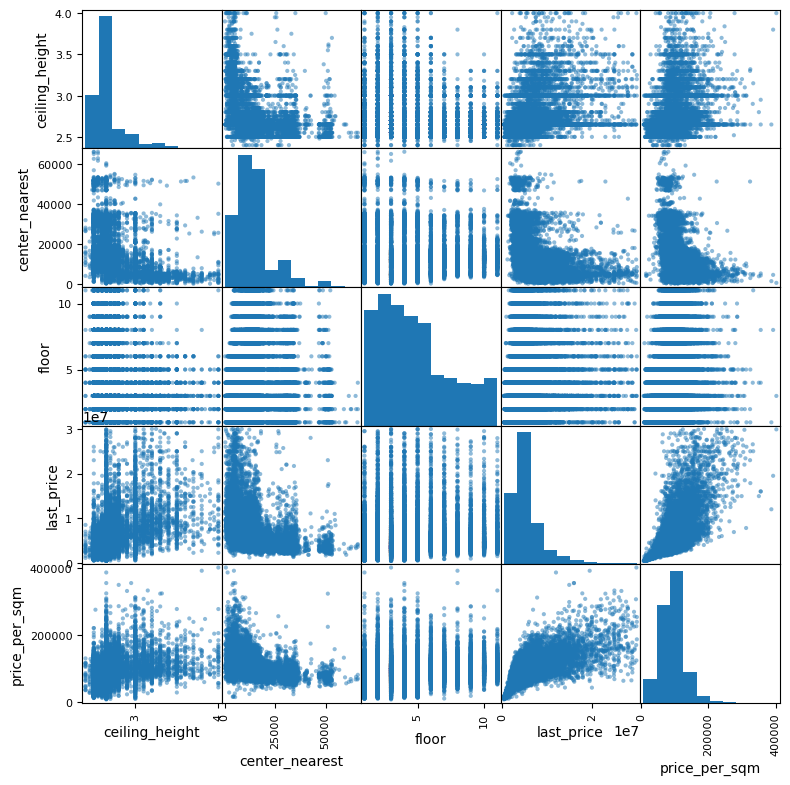

In [218]:
# сводная таблица 
price_other_dependences = data.pivot_table(index=data.index, 
                                    values=['center_nearest',
                                            'price_per_sqm', 
                                            'floor',
                                            'last_price',
                                            'ceiling_height'], 
                                    aggfunc='mean')
# вызуализация диаграммой рассеяния
pd.plotting.scatter_matrix(price_other_dependences.query(
                           '(last_price < 30.0e+06) & (price_per_sqm < 0.5e+06)'
                           )[data['floor'] < 12],
                           figsize=(9, 9))
# зависимость средней цены от этажа 
price_floor_dependence = data.pivot_table(index=('floor_level_category', 'floor'), 
                                          values='price_per_sqm', 
                                          aggfunc=['median', 'count'])

median = data['price_per_sqm'].median()
price_floor_dependence.columns = ['median', 'count'] # переименование столбцов
# подсчет отклонения от медианной цены по всем этажам
price_floor_dependence['price_diff_median'] = price_floor_dependence['median'] / median
display(price_floor_dependence.query('count > 100').sort_values(['floor_level_category', 'median']))
# корреляция значений
price_other_dependences.corr()

Ближе к центру меньше объявлений с квартирами выше 6го этажа, также замечаем, что потолки выше в малоэтажных зданиях, но это все еще может быть связано с ошибкой записи высоты частного дома вместо высоты потолков

Этажи ниже 5го имеют больший разброс по ценам, первые этажи наиболее дешевые, после 9го этажа медианная цена за квадратный метр чуть выше медианной цены недвижимости в целом

Высота потолков не сильно влияет на цену за квадратный метр, но абсолютная цена недвижимости с ростом потолков растет, возможно это связано с возрастанием площади квартиры

In [219]:
data[['ceiling_height', 'total_area']].corr()

,ceiling_height,total_area
ceiling_height,1.000000,0.379465
total_area,0.379465,1.000000


Корреляция присутствует, теория подтвердилась

### Влияние площади на цену

,kitchen_to_total,last_price,living_to_total,price_per_sqm,total_area
kitchen_to_total,1.000000,-0.089198,-0.720744,0.159029,-0.318286
last_price,-0.089198,1.000000,0.003014,0.737293,0.653849
living_to_total,-0.720744,0.003014,1.000000,-0.151044,0.145037
price_per_sqm,0.159029,0.737293,-0.151044,1.000000,0.303449
total_area,-0.318286,0.653849,0.145037,0.303449,1.000000


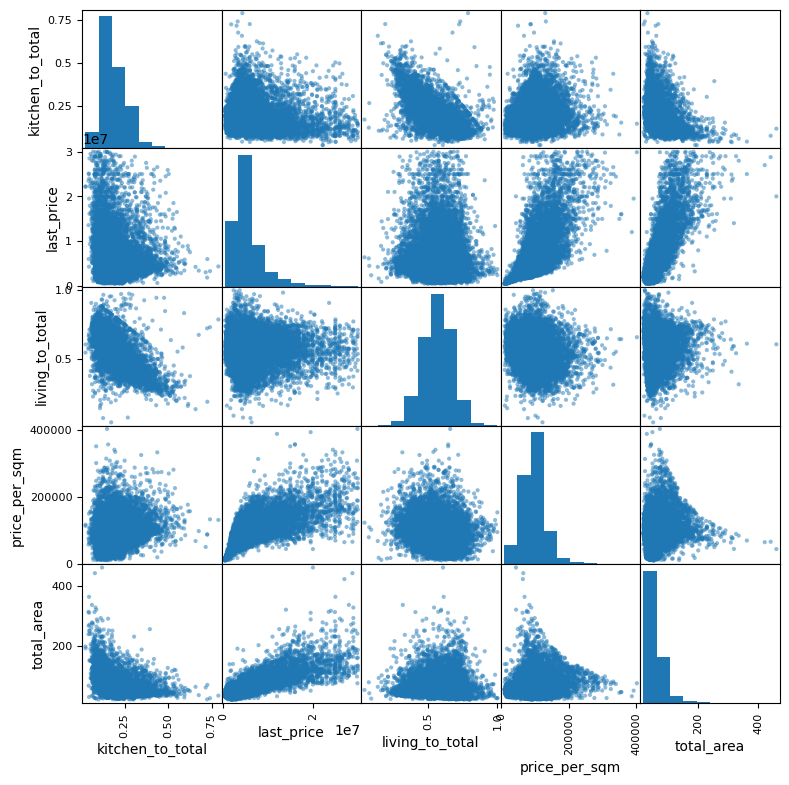

In [220]:
# сводная таблица
price_area_dependence = data.pivot_table(index=data.index, 
                                    values=['last_price',
                                            'price_per_sqm', 
                                            'total_area',
                                            'living_to_total', 
                                            'kitchen_to_total'], 
                                    aggfunc='mean')
# ее визуализация
pd.plotting.scatter_matrix(price_area_dependence.query(
                           'last_price < 30.0e+06 & price_per_sqm < 0.5e+06'),
                           figsize=(9, 9))
# корреляция значений
price_area_dependence.corr()

По этим графикам видим, при возрастании общей площади цена недвижимости так же растет, при этом при возрастании отношения кухни к общей площади, цена падает, что связано с тем, что общая площадь уменьшается

Также, что и ожидалось увидеть, на абсолютную цену недвижимости больше влияет стоимость квадратного метра квартиры, чем общая площадь

### Влияние расстояния до центра

array([[<Axes: xlabel='center_nearest', ylabel='center_nearest'>,
        <Axes: xlabel='last_price', ylabel='center_nearest'>,
        <Axes: xlabel='price_per_sqm', ylabel='center_nearest'>,
        <Axes: xlabel='total_area', ylabel='center_nearest'>],
       [<Axes: xlabel='center_nearest', ylabel='last_price'>,
        <Axes: xlabel='last_price', ylabel='last_price'>,
        <Axes: xlabel='price_per_sqm', ylabel='last_price'>,
        <Axes: xlabel='total_area', ylabel='last_price'>],
       [<Axes: xlabel='center_nearest', ylabel='price_per_sqm'>,
        <Axes: xlabel='last_price', ylabel='price_per_sqm'>,
        <Axes: xlabel='price_per_sqm', ylabel='price_per_sqm'>,
        <Axes: xlabel='total_area', ylabel='price_per_sqm'>],
       [<Axes: xlabel='center_nearest', ylabel='total_area'>,
        <Axes: xlabel='last_price', ylabel='total_area'>,
        <Axes: xlabel='price_per_sqm', ylabel='total_area'>,
        <Axes: xlabel='total_area', ylabel='total_area'>]], dtype=objec

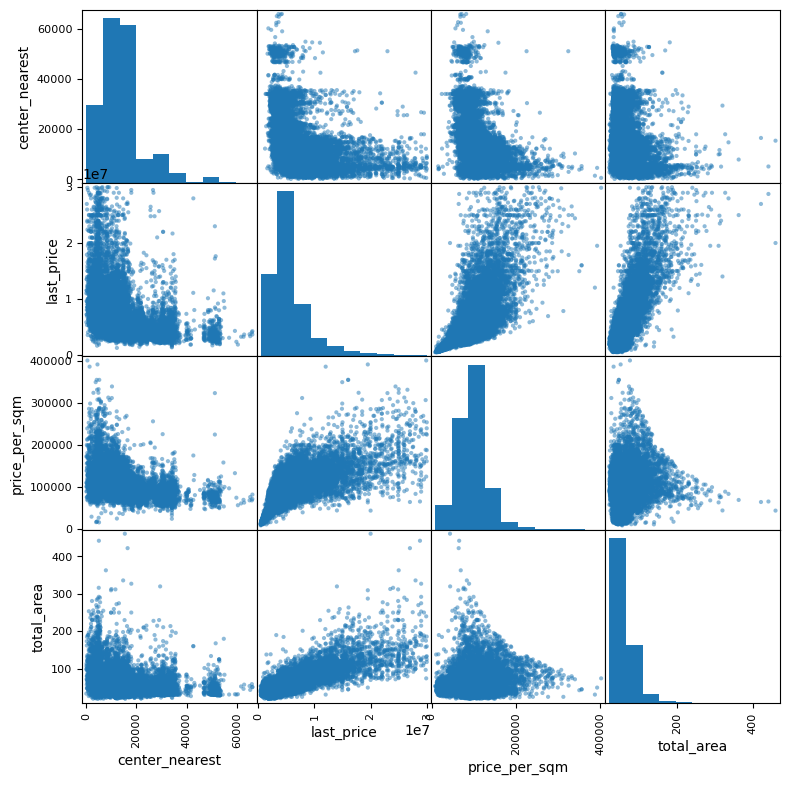

In [221]:
# сводная таблица
price_location_dependence = data.pivot_table(index=data.index, 
                                    values=['center_nearest',
                                            'price_per_sqm', 
                                            'total_area',
                                            'last_price'], 
                                    aggfunc='mean')
# ее визуализация
pd.plotting.scatter_matrix(price_location_dependence.query(
                           'last_price < 30.0e+06 & price_per_sqm < 0.5e+06'),
                           figsize=(9, 9))

Действительно, видим, что меньшее расстояние до центра влияет на большую цену абсолютную и за квадратный метр, ближе к центру наибольшее количество дорогих квартир  

### Изучим время продажи квартиры

В некоторых записях отсутствует информация о времени рамещения, это может быть связано с тем, что те объявления еще не были сняты к моменту выгрузки данных

count    20442.000000
mean       180.885187
std        219.834706
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

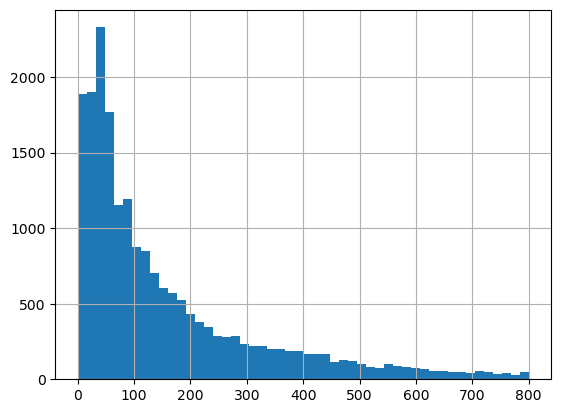

In [222]:
# выведем данные о цене и времени в отдельную переменную
data_by_exposition = data[['last_price', 
                           'first_day_exposition', 
                           'days_exposition', 
                           'exposition_weekday', 
                           'exposition_month', 
                           'exposition_year']]
# изучим данные и построим гистограмму
data_by_exposition['days_exposition'].hist(bins=50, range=[0, 800])
data_by_exposition['days_exposition'].describe()

График соответствует распределению Пуассона, медианное значение - 95 дней, а среднее - 190 дней, больше года объявления висят крайне редко, 75% процентов обьявлений снимают меньше чем за 8 месяцев

Есть довольно большое количество объявлений, снятых меньше чем за месяц, но трудно судить, связано ли это с покупкой квартиры или с какими-то другими причинами (к примеру, продавец просто передумал продавать квартииру)


<Axes: xlabel='exposition_weekday'>

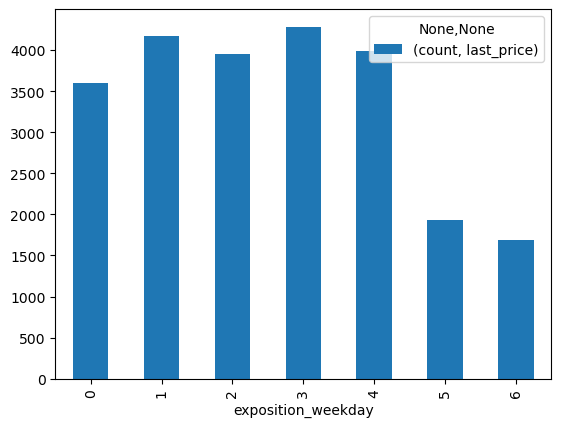

In [223]:
# диаграмма по дням недели 
data_by_exposition.pivot_table(index='exposition_weekday',
                               values='last_price',
                               aggfunc=['count']).plot(kind='bar')

Чаще всего объявления размещают на неделе, по выходным не очень охотно, проверим частоту по месяцам

<Axes: xlabel='exposition_month'>

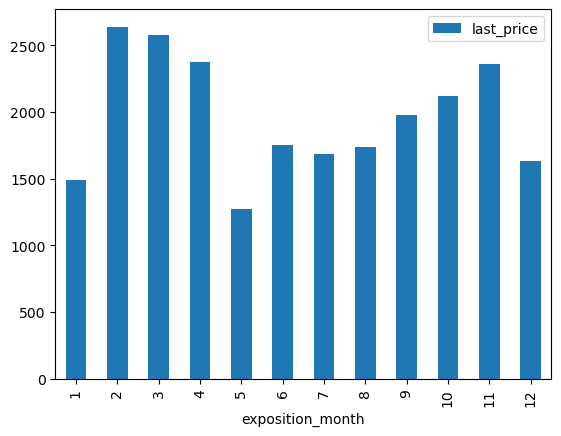

In [224]:
# диаграмма по месецам 
data_by_exposition.pivot_table(index='exposition_month',
                               values='last_price',
                               aggfunc=['count']
                               )['count'].plot(kind='bar')

Охотнее всего размещают объявления с февраля по апрель, в мае резкий спад активности, осенью он возрастает до пика в ноябре, в декабре и январе активность снова невысокая

Возможно, спады в мае и январе связаны с выходными неделями, в которые люди предпочитают отдыхать, как по субботам и воскресеньям

<Axes: xlabel='exposition_year'>

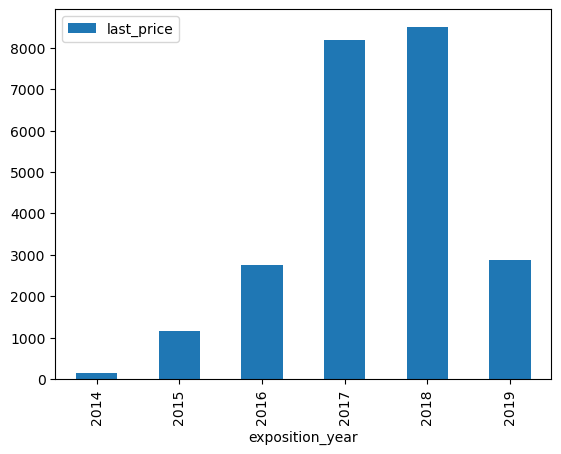

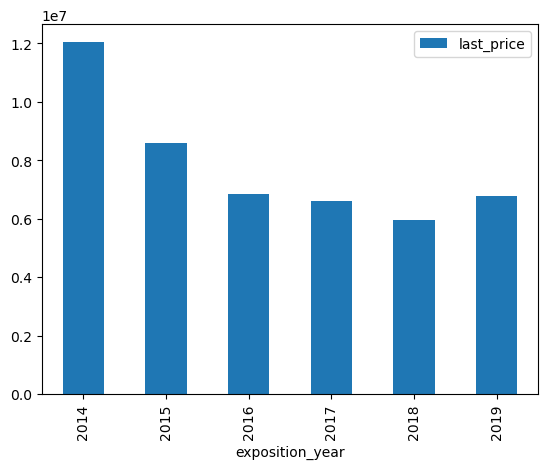

In [225]:
# распределение по годам
data_by_year = data_by_exposition.pivot_table(index='exposition_year',
                                              values='last_price',
                                              aggfunc=['mean', 'count'])
data_by_year['count'].plot(kind='bar') # количество обявлений
data_by_year['mean'].plot(kind='bar') # средняя цена недвижимости

Больше всего объявлений было выставлено в 2017 и 2018 годах, это может быть связано с возросшей популярностью сервиса в тот промежуток времени или с активностью рынка продажи недвижимости

При этом средняя цена недвижимости с 2014 года по-немногу снижается, что так же может быть связано с ростом популярности сервиса или экономическим состоянием рынка недвижимости, к примеру с ростом курса доллара

In [226]:
print('Представленные месяцы в 2019:', 
      *data.query('exposition_year == 2019')['exposition_month'].unique())
print('Представленные месяцы в 2014:', 
      *data.query('exposition_year == 2014')['exposition_month'].unique())

Представленные месяцы в 2019: 3 4 1 2 5
Представленные месяцы в 2014: 12 11


О 2019 и 2014 годах нельзя делать однозначные выводы, так как на момент выгрузки данных была информация только по май 2019, а за 2014 год у нас данные только о ноябре и декабре


### Влияние времени размещения на продажи

,last_price,first_day_exposition,days_exposition,exposition_weekday,exposition_month,exposition_year
last_price,1.000000,-0.043443,0.080736,0.001582,0.002839,-0.042789
first_day_exposition,-0.043443,1.000000,-0.629905,-0.001627,0.009040,0.959753
days_exposition,0.080736,-0.629905,1.000000,-0.025077,-0.029941,-0.611487
exposition_weekday,0.001582,-0.001627,-0.025077,1.000000,0.011582,-0.003735
exposition_month,0.002839,0.009040,-0.029941,0.011582,1.000000,-0.271237
exposition_year,-0.042789,0.959753,-0.611487,-0.003735,-0.271237,1.000000


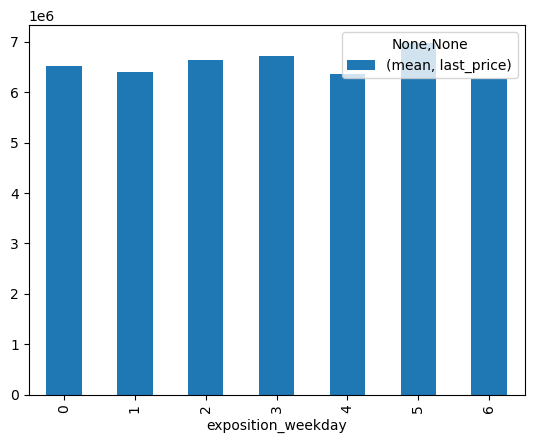

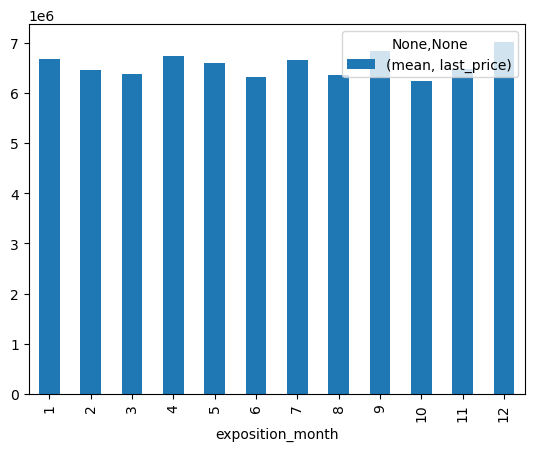

In [227]:
# визуализация зависимости от дня недели
data_by_exposition.pivot_table(index='exposition_weekday',
                               values='last_price',
                               aggfunc=['mean']).plot(kind='bar')
# зависимость от месяца размещения
data_by_exposition.pivot_table(index='exposition_month',
                               values='last_price',
                               aggfunc=['mean']).plot(kind='bar')
# таблица зависимостей
data_by_exposition.corr()

На цену никак не влиют день и месяц размещения

### Изучим квартиры в Санкт-Петербурге

<Axes: xlabel='km_to_center'>

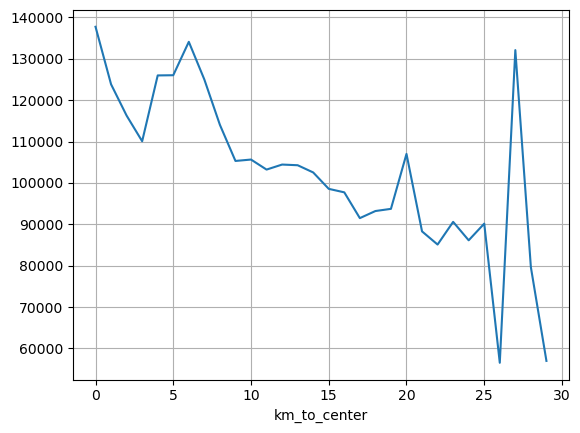

In [228]:
# выделим в отдельную переменную 
data_by_spb = data.query('locality_name == "Санкт-Петербург"')[['last_price',
                                                               'price_per_sqm',
                                                               'center_nearest']]
# переведем значения в километры
data_by_spb['km_to_center'] = data_by_spb['center_nearest']//1000
data_by_spb['km_to_center'] = data_by_spb['km_to_center'].apply(round)
data_by_spb = data_by_spb.pivot_table(index='km_to_center',
                                      values=['price_per_sqm', 'last_price'],
                                      aggfunc='median')
# построим график медианной цены за квадратный метр для каждого километра
data_by_spb['price_per_sqm'].plot(grid=True)

<Axes: xlabel='km_to_center'>

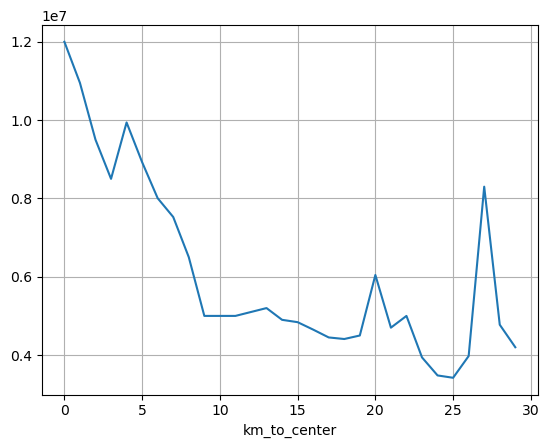

In [229]:
# график общей медианной цены для каждого километра
data_by_spb['last_price'].plot(grid=True)

После примерно 7го километра цена за квадратный метр резко снижается, таким образом можем установить, что центральная зона города заканчивается где-то на расстоянии 7ми километров от центра

### Изучим квартиры в центральной зоне

<Axes: ylabel='Frequency'>

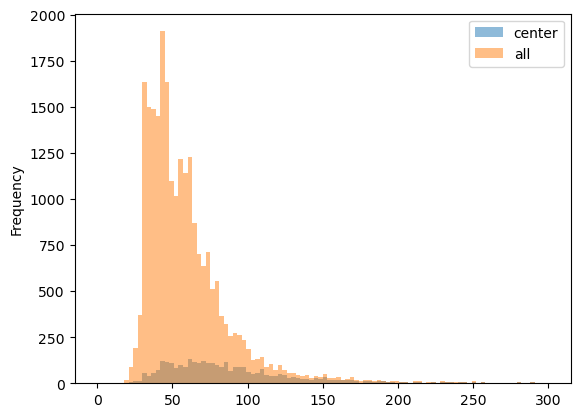

In [230]:
# выделим в отдельную переменную
data_spb_center = data.query('locality_name == "Санкт-Петербург" & center_nearest < 7000')
# гистограмма площадей квартир для центрального района
ax = data_spb_center['total_area'].plot(kind = 'hist', 
                                        bins = 100, 
                                        alpha = 0.5, 
                                        range = [0, 300],
                                        label = 'center',
                                        legend = True)
# площади квартир по городу
data['total_area'].plot(kind = 'hist', 
                        bins = 100, 
                        alpha = 0.5, 
                        ax = ax, 
                        range = [0,300],
                        label = 'all',
                        legend = True)

Площадь квартир в центральном районе намного больше, чем в целом по городу

Медианная цена в центральном районе: 9300000
Медианная цена по городу: 4650000


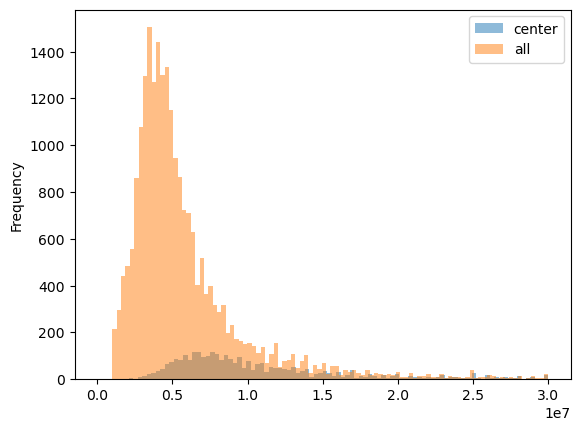

In [231]:
# то же самое для цен
ax = data_spb_center['last_price'].plot(kind = 'hist', 
                                        bins = 100, 
                                        alpha = 0.5, 
                                        range = [0, 30000000],
                                        label = 'center',
                                        legend = True)

data['last_price'].plot(kind = 'hist', 
                        bins = 100, 
                        alpha = 0.5, 
                        ax = ax, 
                        range = [1000000, 30000000],
                        label = 'all',
                        legend = True)
# выведем медианные цены
print('Медианная цена в центральном районе:', int(data_spb_center['last_price'].median()))
print('Медианная цена по городу:', int(data['last_price'].median()))

В центральном районе медианная цена квартир практически в два раза выше, чем в целом по Санкт-Петербургу 

Медианная цена за квадратный метр в центральном районе: 123447
Медианная цена за квадратный метр по городу: 95000


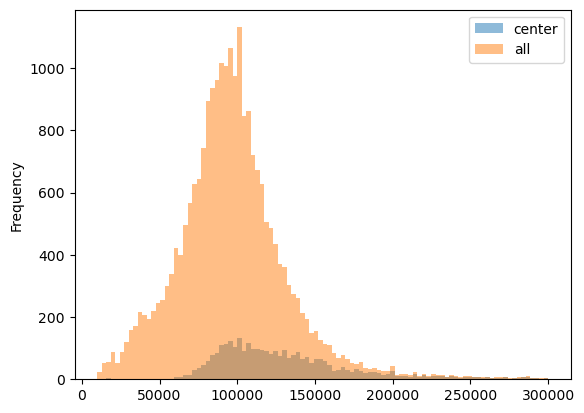

In [232]:
# гистограммы цен за квадратный метр
ax = data_spb_center['price_per_sqm'].plot(kind = 'hist', 
                                        bins = 100, 
                                        alpha = 0.5, 
                                        range = [10000, 300000],
                                        label = 'center',
                                        legend = True)

data['price_per_sqm'].plot(kind = 'hist', 
                        bins = 100, 
                        alpha = 0.5, 
                        ax = ax, 
                        range = [10000, 300000],
                        label = 'all',
                        legend = True)
# медианные цены за квадратный метр
print('Медианная цена за квадратный метр в центральном районе:', int(data_spb_center['price_per_sqm'].median()))
print('Медианная цена за квадратный метр по городу:', int(data['price_per_sqm'].median()))

Несмотря на это, цена квадратного метра не сильно выше, то есть цена квартир в основном высокая засчет общей площади

<Axes: ylabel='Frequency'>

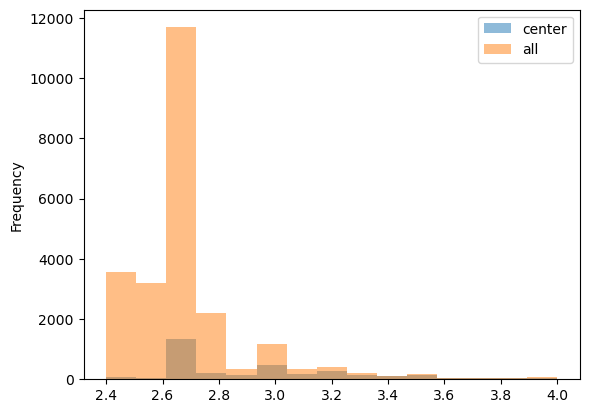

In [233]:
# распределение высоты потолков
ax = data_spb_center['ceiling_height'].plot(kind='hist', 
                                            alpha = 0.5,
                                            bins=15,
                                            label = 'center',
                                            legend = True)

data['ceiling_height'].plot(kind='hist',
                        alpha = 0.5, 
                        bins=15,
                        ax = ax,
                        label = 'all',
                        legend = True)

Распределение высоты потолков не сильно различается, разве что в центре высота не опускается ниже 2.6м 

<Axes: ylabel='Frequency'>

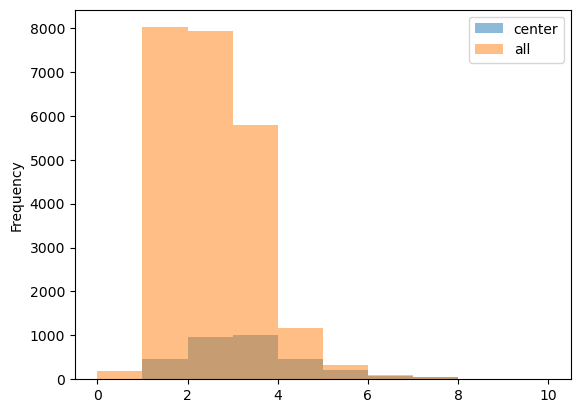

In [234]:
# распределение количества комнат
ax = data_spb_center['rooms'].plot(kind='hist', 
                                   alpha = 0.5,
                                   bins=10,
                                   range = [0, 10],
                                   label = 'center',
                                   legend = True)

data['rooms'].plot(kind='hist',
                   alpha = 0.5,
                   bins=10,
                   range = [0, 10],
                   ax = ax,
                   label = 'all',
                   legend = True)

В центре квартиры имеют больше комнат, не так часто встречаются однокомнатные

,last_price,price_per_sqm,rooms,floor,center_nearest,first_day_exposition,ceiling_height
last_price,1.000000,0.795502,0.308908,0.121531,-0.043180,-0.042472,0.090751
price_per_sqm,0.795502,1.000000,-0.008899,0.135508,-0.028052,0.016178,0.041526
rooms,0.308908,-0.008899,1.000000,-0.034199,-0.160386,-0.066866,0.219146
floor,0.121531,0.135508,-0.034199,1.000000,0.208163,-0.027995,-0.151143
center_nearest,-0.043180,-0.028052,-0.160386,0.208163,1.000000,0.041176,-0.191017
first_day_exposition,-0.042472,0.016178,-0.066866,-0.027995,0.041176,1.000000,0.054226
ceiling_height,0.090751,0.041526,0.219146,-0.151143,-0.191017,0.054226,1.000000


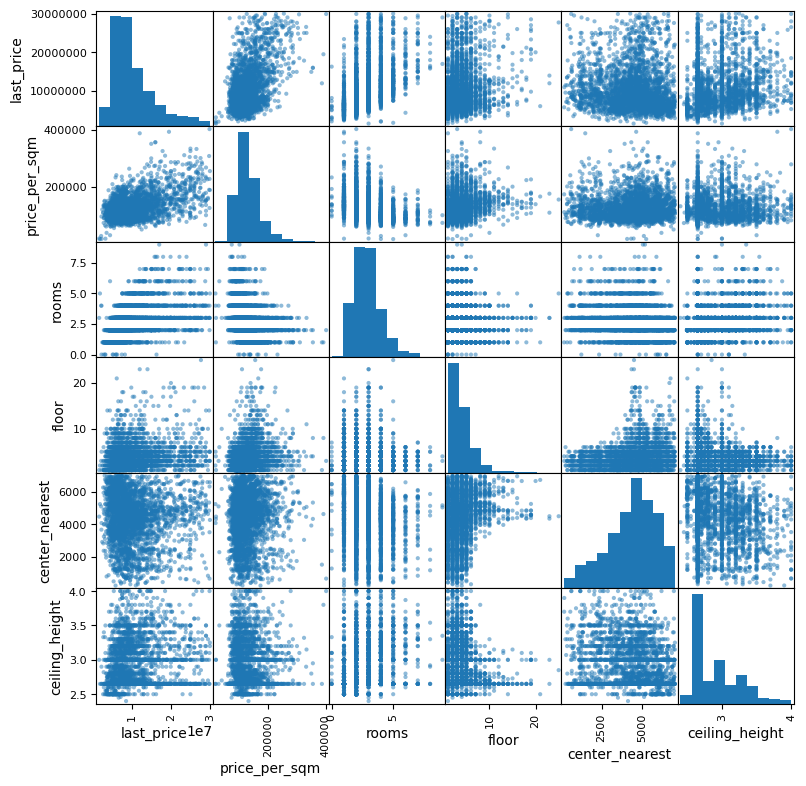

In [235]:
# диаграмма распределения в центре города
price_in_center = data_spb_center[['last_price', 
                                   'price_per_sqm',
                                   'rooms', 
                                   'floor', 
                                   'center_nearest', 
                                   'first_day_exposition',
                                   'ceiling_height']]

pd.plotting.scatter_matrix(price_in_center.query(
                           'last_price < 30.0e+06 & price_per_sqm < 0.5e+06 & rooms < 10'), 
                           figsize=[9, 9])
# таблица корреляций
price_in_center.corr()

Видим, что цена квадратного метра в квартирах на высоком этаже меньше, у квартир с количеством комнат больше 5ти цена снижается, при этом высота потолков и расстояние до центра на цену в центральном районе практически не влияет

В отличие от квартир не в центральном районе, высотность здания и количество комнат сильнее влияют на цену квартиры, причем ее уменьшая, а расстояние до центра уже не влияет столь же сильно, как на квартиры в целом по городу

## Общий вывод

Наибольшее влияние на цену имеет площадь квартиры, расстояние до центра и населенный пункт, в центральном районе количество однокомнатных квартир намного меньше, чем вне центра, а также средняя цена в центральном районе выше, чем по городу, при этом влияние разных факторов в центральном районе Санкт-Петербуга отличается от влияния этих же факторов на недвижимость в других районах

